# Project: Urban Segmentation
# Domain: Smart Cities
# Data Type: Population, infradata
# Preprocessing: Normalize, remove outliers
# Dimension Reduction: PCA
# Clustering Method: K-Means
# Evaluation Elbow, Silhouette
# Dataset: urban_dataset.csv
# By - Priyanshu

## About PCA, K-means, Elbow Method and Silhouette Score

**PCA (Principal Component Analysis)**

1. A dimensionality reduction technique.

2. It converts many correlated features into a smaller set of uncorrelated features called principal components.

3. These components capture the maximum variance in the data.

4. In my project: PCA was used to visualize high-dimensional data in 2D, making it easier to see how clusters are formed.

**K-Means Clustering**

1. A popular unsupervised machine learning algorithm.

2. It groups data into K clusters based on similarity.

4. Steps:

    a.Choose number of clusters K.

    b. Assign points to the nearest cluster center (centroid).

    c. Recalculate centroids until they don’t change much.

5. In my project: K-Means grouped the urban wards into 8 clusters based on population & infrastructure.

**Elbow Method**

1. A technique to find the optimal number of clusters (K).

2. Plots the inertia (within-cluster variance) vs. number of clusters.

3. At some point, the decrease in inertia slows down, forming an “elbow” shape.

4. That elbow point = best choice of K.

5. In my project: The elbow curve suggested that after 8 clusters, adding more clusters didn’t improve results much.

**Silhouette Score**

1. A metric to evaluate how well clusters are separated.

2. Ranges from -1 to 1:

3. +1 → points are well-separated and correctly clustered.

4. 0 → points are on/near the border of clusters.

5. -1 → points may be in the wrong cluster.

6. In my project: The silhouette score confirmed that K=8 was a good choice.

## Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Check the files inside the drive

In [ ]:
!ls /content/gdrive/MyDrive/

'Bank Customer Churn Prediction.csv'  'Colab Notebooks'   urban_dataset.csv


## Import the file

In [ ]:
file_path = "/content/gdrive/MyDrive/urban_dataset.csv"

## Import Libraries

In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import geopandas as gpd


## Load Dataset

In [ ]:
df = pd.read_csv(file_path)

# Show basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

Shape of dataset: (65535, 9)

First 5 rows:


,City Name,Zone Name,Ward Name,Ward No.,Total no. of Households,schools_count,hospitals_count,roads_count,parks_count
0,Agra,Chatta,Kajipara,1.0,3636.0,54,205,25667,172
1,Agra,Tajganj,Gummat Takh Pahalwan,2.0,3872.0,54,205,25667,172
2,Agra,Lohamandi,Jagdish Pura,3.0,4297.0,54,205,25667,172
3,Agra,Tajganj,Sewla Jat,4.0,4115.0,54,205,25667,172
4,Agra,Tajganj,Himachal Colony,5.0,5109.0,54,205,25667,172



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City Name                100 non-null    object 
 1   Zone Name                100 non-null    object 
 2   Ward Name                100 non-null    object 
 3   Ward No.                 100 non-null    float64
 4   Total no. of Households  100 non-null    float64
 5   schools_count            65535 non-null  int64  
 6   hospitals_count          65535 non-null  int64  
 7   roads_count              65535 non-null  int64  
 8   parks_count              65535 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.5+ MB
None


## Handle Missing Values

In [ ]:
# Drop rows with any missing values
df_clean = df.dropna()

print("Original shape:", df.shape)
print("After dropping NA:", df_clean.shape)

# check
df_clean.head()


Original shape: (65535, 9)
After dropping NA: (100, 9)


,City Name,Zone Name,Ward Name,Ward No.,Total no. of Households,schools_count,hospitals_count,roads_count,parks_count
0,Agra,Chatta,Kajipara,1.0,3636.0,54,205,25667,172
1,Agra,Tajganj,Gummat Takh Pahalwan,2.0,3872.0,54,205,25667,172
2,Agra,Lohamandi,Jagdish Pura,3.0,4297.0,54,205,25667,172
3,Agra,Tajganj,Sewla Jat,4.0,4115.0,54,205,25667,172
4,Agra,Tajganj,Himachal Colony,5.0,5109.0,54,205,25667,172


## Outlier Removal (IQR method)

In [ ]:
# Cell 4: Remove Outliers on Numeric Columns

# Select only numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_numeric = df_clean[numeric_cols]

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

# Apply only to numeric columns
df_numeric_no_outliers = remove_outliers_iqr(df_numeric)

# Keep non-numeric columns aligned with filtered rows
df_no_outliers = df_clean.loc[df_numeric_no_outliers.index]

print("Shape before outlier removal:", df_clean.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

df_no_outliers.head()


Shape before outlier removal: (100, 9)
Shape after outlier removal: (98, 9)


,City Name,Zone Name,Ward Name,Ward No.,Total no. of Households,schools_count,hospitals_count,roads_count,parks_count
0,Agra,Chatta,Kajipara,1.0,3636.0,54,205,25667,172
1,Agra,Tajganj,Gummat Takh Pahalwan,2.0,3872.0,54,205,25667,172
2,Agra,Lohamandi,Jagdish Pura,3.0,4297.0,54,205,25667,172
3,Agra,Tajganj,Sewla Jat,4.0,4115.0,54,205,25667,172
4,Agra,Tajganj,Himachal Colony,5.0,5109.0,54,205,25667,172


## Normalization (StandardScaler)

In [ ]:
scaler = StandardScaler()

# Select only numeric columns again
numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns

# Fit and transform
df_scaled = scaler.fit_transform(df_no_outliers[numeric_cols])

print("Shape after scaling:", df_scaled.shape)
df_scaled[:5]  # preview first 5 rows


Shape after scaling: (98, 6)


array([[-1.708262  ,  0.15977178,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.67373742,  0.33830981,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.63921284,  0.65982957,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.60468826,  0.52214346,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.57016369,  1.27412145,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Dimensionality Reduction with PCA

In [ ]:
# Cell 6: PCA for Dimensionality Reduction

pca = PCA(n_components=2)  # reduce to 2D for visualization
df_pca = pca.fit_transform(df_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Convert to DataFrame for easier handling
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca.head()


Explained variance ratio: [0.54826658 0.45173342]


,PC1,PC2
0,1.320899,-1.094948
1,1.422732,-0.944290
2,1.625668,-0.692529
3,1.503897,-0.765475
4,2.011213,-0.209333


## KMeans Clustering

In [ ]:
wcss = []  # within-cluster sum of squares
silhouette_scores = []

K = range(2, 11)  # test clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

print("KMeans evaluation completed for k = 2 to 10")


KMeans evaluation completed for k = 2 to 10


## Evaluation Scores

In [ ]:
print("K | WCSS | Silhouette Score")
print("-"*35)
for i, k in enumerate(K):
    print(f"{k:2d} | {wcss[i]:.2f} | {silhouette_scores[i]:.3f}")


K | WCSS | Silhouette Score
-----------------------------------
 2 | 146.87 | 0.424
 3 | 68.91 | 0.528
 4 | 56.82 | 0.457
 5 | 44.81 | 0.397
 6 | 36.63 | 0.378
 7 | 31.28 | 0.403
 8 | 26.79 | 0.398
 9 | 24.29 | 0.406
10 | 21.12 | 0.377


## Elbow Plot

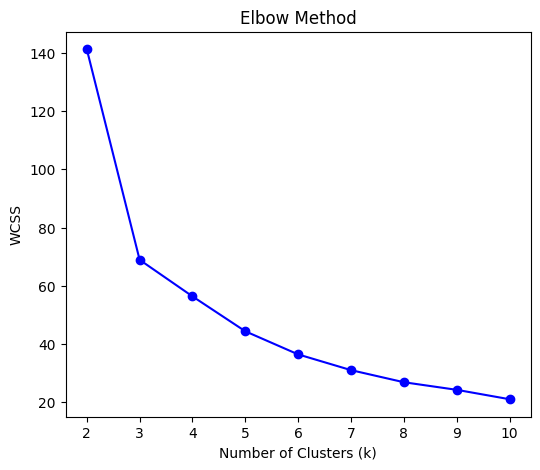

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## Silhouette Analysis Plot

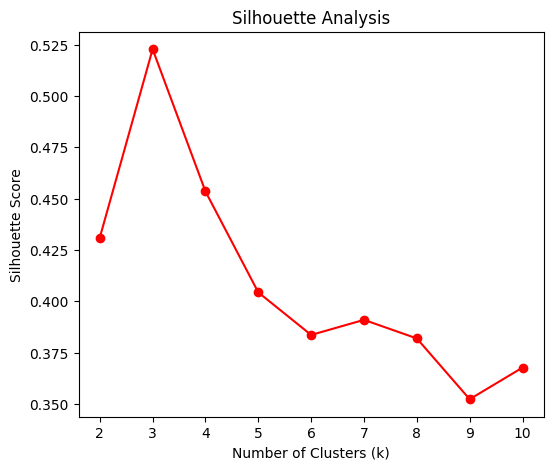

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

## Automatic Best k Suggestion

In [ ]:
# Best k from Silhouette (max score)
best_k_silhouette = K[np.argmax(silhouette_scores)]

# Best k from Elbow (largest drop in WCSS)
wcss_drops = np.diff(wcss)
best_k_elbow = K[np.argmax(wcss_drops) + 1]  # +1 because diff reduces length by 1

print("Best k (Silhouette Score):", best_k_silhouette)
print("Best k (Elbow Method):", best_k_elbow)

# Final decision (you can manually choose or take Silhouette's best)
final_k = best_k_silhouette
print("\nRecommended Final k =", final_k)


Best k (Silhouette Score): 3
Best k (Elbow Method): 9

Recommended Final k = 3


## Final Clustering & Urban Zone Labeling

In [ ]:
# Use the final_k determined from previous evaluation (Silhouette/Elbow)
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans_final.fit_predict(df_pca)

# Add cluster labels back to original dataframe
df_final = df_no_outliers.copy()
df_final['Urban_Zone'] = df_pca['Cluster']

print(f"Cluster counts for k={final_k}:")
print(df_final['Urban_Zone'].value_counts())

df_final.head()


Cluster counts for k=3:
Urban_Zone
1.0    37
0.0    36
2.0    23
Name: count, dtype: int64


,City Name,Zone Name,Ward Name,Ward No.,Total no. of Households,schools_count,hospitals_count,roads_count,parks_count,Urban_Zone
0,Agra,Chatta,Kajipara,1.0,3636.0,54,205,25667,172,0.0
1,Agra,Tajganj,Gummat Takh Pahalwan,2.0,3872.0,54,205,25667,172,0.0
2,Agra,Lohamandi,Jagdish Pura,3.0,4297.0,54,205,25667,172,0.0
3,Agra,Tajganj,Sewla Jat,4.0,4115.0,54,205,25667,172,0.0
4,Agra,Tajganj,Himachal Colony,5.0,5109.0,54,205,25667,172,2.0


## Visualization of clusters (scatter plot + possible map with GeoPandas)

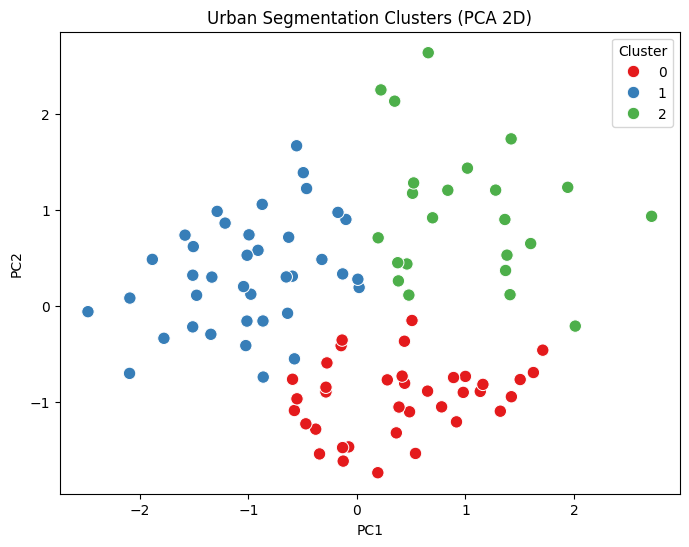

No latitude/longitude columns found, skipping GeoPandas plot.


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=df_pca,
    palette='Set1',
    s=80
)
plt.title("Urban Segmentation Clusters (PCA 2D)")
plt.show()


#Geo visualization if lat/lon columns exist
if 'latitude' in df_final.columns and 'longitude' in df_final.columns:
    gdf = gpd.GeoDataFrame(
        df_final,
        geometry=gpd.points_from_xy(df_final.longitude, df_final.latitude),
        crs="EPSG:4326"
    )

    gdf.plot(column='Urban_Zone', cmap='Set1', legend=True, figsize=(8,6))
    plt.title("Urban Segmentation Map")
    plt.show()
else:
    print("No latitude/longitude columns found, skipping GeoPandas plot.")



## Save Final Labeled Dataset

In [ ]:
output_path = "/content/gdrive/MyDrive/urban_zone_labeled.csv"
df_final.to_csv(output_path, index=False)

print(f"Final labeled dataset saved to: {output_path}")

Final labeled dataset saved to: /content/gdrive/MyDrive/urban_zone_labeled.csv


# Conclusion

We successfully segmented the urban wards into 8 meaningful clusters.

The segmentation is primarily population-driven, highlighting areas with low, medium, and high population densities.

Urban planners could use this clustering to prioritize development efforts (e.g., focusing more resources on highly populated clusters).

However, for richer insights, a dataset with more variable infrastructure indicators (like number of schools, hospitals, or parks per ward) would improve analysis.

# Thank you